# In this document I am recreateing the gen Pt plot of the dark photons from Analysis note (fig 3)

## Here I am using two methods to process the data.

First we are importing all the packages required

In [ ]:
# python
import sys
import os
import importlib
from coffea import processor
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak   #numpy like module for handling arrays
#plotting
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from analysis.tools import ffschema, sidm_processor
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 

plotting style defined as cms style 

In [2]:

plt.style.use(hep.style.CMS)

Following are the 6 different root files used for this plotting

In [3]:
sample_dir = "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018/"
sample_name1 = "SIDM_XXTo2ATo2Mu2E_mXX-100_mA-5_ctau-4"
sample_name2 = "SIDM_XXTo2ATo2Mu2E_mXX-150_mA-5_ctau-2p7"
sample_name3 = "SIDM_XXTo2ATo2Mu2E_mXX-200_mA-5_ctau-2"
sample_name4 = "SIDM_XXTo2ATo2Mu2E_mXX-500_mA-5_ctau-0p8"
sample_name5 = "SIDM_XXTo2ATo2Mu2E_mXX-800_mA-5_ctau-0p5"
sample_name6 = "SIDM_XXTo2ATo2Mu2E_mXX-1000_mA-5_ctau-0p4"
sample_file1 = f"{sample_dir}/{sample_name1}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155809/0000/ffNtuple_1.root"
sample_file2 = f"{sample_dir}/{sample_name2}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155637/0000/ffNtuple_1.root"
sample_file3 = f"{sample_dir}/{sample_name3}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155722/0000/ffNtuple_1.root"
sample_file4 = f"{sample_dir}/{sample_name4}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_160450/0000/ffNtuple_1.root"
sample_file5 = f"{sample_dir}/{sample_name5}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_153128/0000/ffNtuple_1.root"
sample_file6 = f"{sample_dir}/{sample_name6}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_154240/0000/ffNtuple_1.root"


print(sample_file1)
print(sample_file2)
print(sample_file3)
print(sample_file4)
print(sample_file5)
print(sample_file6)
      



root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-100_mA-5_ctau-4_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155809/0000/ffNtuple_1.root
root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-150_mA-5_ctau-2p7_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155637/0000/ffNtuple_1.root
root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-200_mA-5_ctau-2_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155722/0000/ffNtuple_1.root
root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-500_mA-5_ctau-0p8_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_160450/0000/ffNtuple_1.root
root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-800_mA-5_ctau-0p5_TuneCP5_13TeV-madgraph-pyt

In [4]:
events1 = NanoEventsFactory.from_root(
    sample_file1,
    treepath='ffNtuplizer/ffNtuple',
    schemaclass=ffschema.FFSchema,
    metadata = {
        "dataset": sample_name1, 
    },
).events()
events2 = NanoEventsFactory.from_root(
    sample_file2,
    treepath='ffNtuplizer/ffNtuple',
    schemaclass=ffschema.FFSchema,
    metadata = {
        "dataset": sample_name2, 
    },
).events()
events3 = NanoEventsFactory.from_root(
    sample_file3,
    treepath='ffNtuplizer/ffNtuple',
    schemaclass=ffschema.FFSchema,
    metadata = {
        "dataset": sample_name3, 
    },
).events()
events4 = NanoEventsFactory.from_root(
    sample_file4,
    treepath='ffNtuplizer/ffNtuple',
    schemaclass=ffschema.FFSchema,
    metadata = {
        "dataset": sample_name4, 
    },
).events()
events5 = NanoEventsFactory.from_root(
    sample_file5,
    treepath='ffNtuplizer/ffNtuple',
    schemaclass=ffschema.FFSchema,
    metadata = {
        "dataset": sample_name5, 
    },
).events()
events6 = NanoEventsFactory.from_root(
    sample_file6,
    treepath='ffNtuplizer/ffNtuple',
    schemaclass=ffschema.FFSchema,
    metadata = {
        "dataset": sample_name6, 
    },
).events()


In [5]:
print(events1)

[{run: 1, event: 213127, lumi: 641, fixedGridRho: 7.41, ... t: 14.9}}]}]


In [6]:
channels = ["2mu2e", "4mu", "base", "noLjPtCut"]
hists = ["base_plus_gen"]
p1 = sidm_processor.SidmProcessor([channels[0]], hists)
'''
p2 = sidm_processor.SidmProcessor([channels[0]], hists)

p3 = sidm_processor.SidmProcessor([channels[0]], hists)
p4 = sidm_processor.SidmProcessor([channels[0]], hists)
p5 = sidm_processor.SidmProcessor([channels[0]], hists)
p6 = sidm_processor.SidmProcessor([channels[0]], hists)
'''
#p2 = sidm_processor.SidmProcessor([channels[0]], hists)

out1 = p1.process(events1)
out2 = p1.process(events2)
out3 = p1.process(events3)

out4 = p1.process(events4)
out5 = p1.process(events5)
out6 = p1.process(events6)




Dark Photon Pt for different samples

Text(0, 1, 'counts')

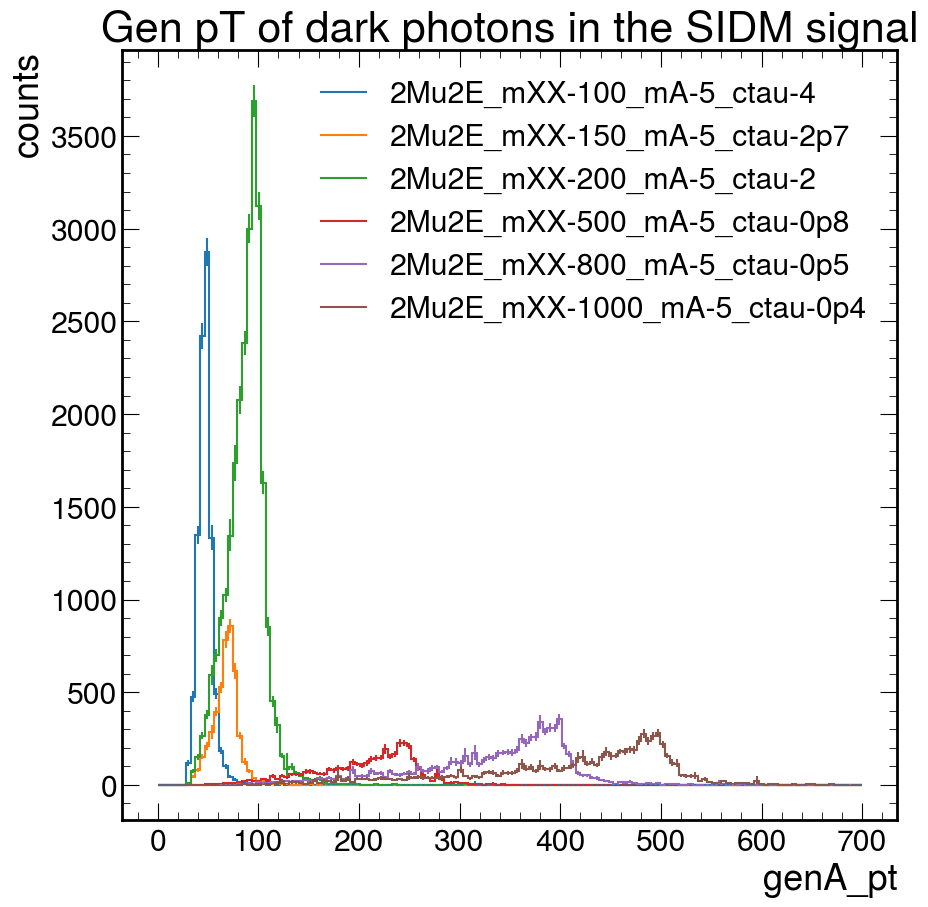

In [7]:
ch = channels[0]
out1[sample_name1]["hists"]["genA_pt"][ch, :].plot()
out2[sample_name2]["hists"]["genA_pt"][ch, :].plot()
out3[sample_name3]["hists"]["genA_pt"][ch, :].plot()

out4[sample_name4]["hists"]["genA_pt"][ch, :].plot()
out5[sample_name5]["hists"]["genA_pt"][ch, :].plot()
out6[sample_name6]["hists"]["genA_pt"][ch, :].plot()
plt.legend(["2Mu2E_mXX-100_mA-5_ctau-4", "2Mu2E_mXX-150_mA-5_ctau-2p7", 
            "2Mu2E_mXX-200_mA-5_ctau-2","2Mu2E_mXX-500_mA-5_ctau-0p8",
            "2Mu2E_mXX-800_mA-5_ctau-0p5","2Mu2E_mXX-1000_mA-5_ctau-0p4"])
plt.title("Gen pT of dark photons in the SIDM signal")
plt.ylabel("counts")


Density plot for Gen Pt

Text(0, 1, '')

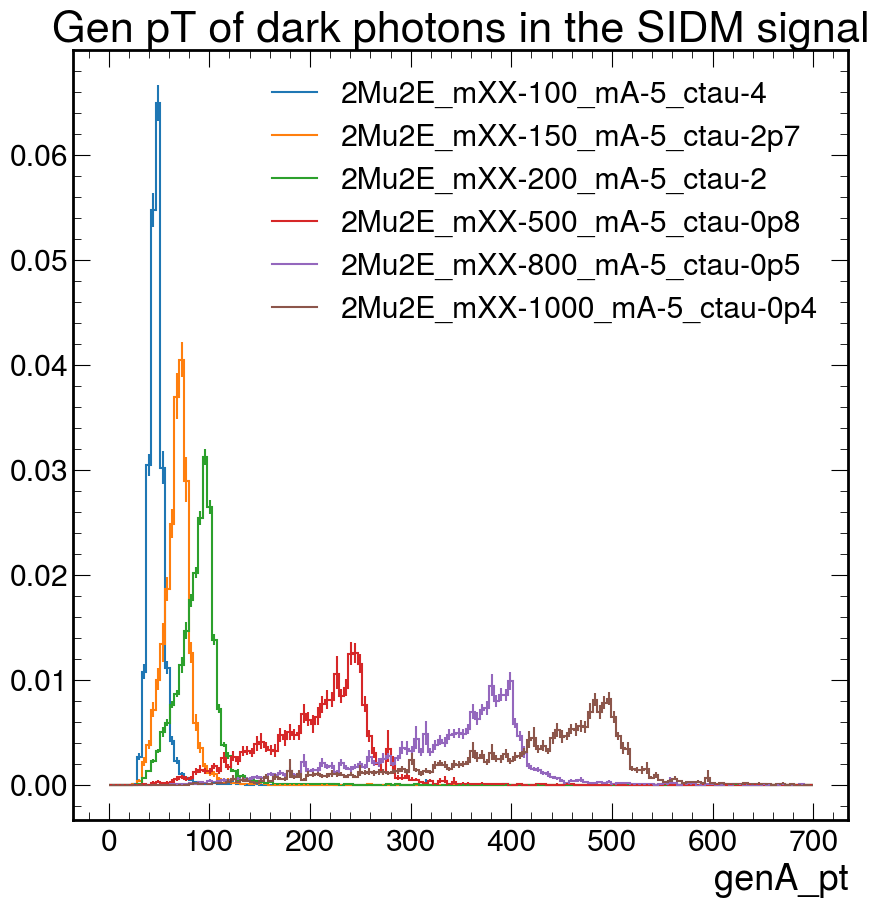

In [8]:
hep.histplot(out1[sample_name1]["hists"]["genA_pt"]["2mu2e",:], density=True)
hep.histplot(out2[sample_name2]["hists"]["genA_pt"]["2mu2e",:], density=True)
hep.histplot(out3[sample_name3]["hists"]["genA_pt"]["2mu2e",:], density=True)
hep.histplot(out4[sample_name4]["hists"]["genA_pt"]["2mu2e",:], density=True)
hep.histplot(out5[sample_name5]["hists"]["genA_pt"]["2mu2e",:], density=True)
hep.histplot(out6[sample_name6]["hists"]["genA_pt"]["2mu2e",:], density=True)
plt.legend(["2Mu2E_mXX-100_mA-5_ctau-4", "2Mu2E_mXX-150_mA-5_ctau-2p7", 
            "2Mu2E_mXX-200_mA-5_ctau-2","2Mu2E_mXX-500_mA-5_ctau-0p8",
            "2Mu2E_mXX-800_mA-5_ctau-0p5","2Mu2E_mXX-1000_mA-5_ctau-0p4"])
plt.title("Gen pT of dark photons in the SIDM signal")
plt.ylabel("")


In [ ]:
Repeating the same plot using runner met

In [10]:
fileset = {
    "2Mu2E_100GeV_5GeV_4mm"    : ["root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-100_mA-5_ctau-4_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155809/0000/ffNtuple_1.root",
                                 "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-100_mA-5_ctau-4_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155809/0000/ffNtuple_2.root",
                                 "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-100_mA-5_ctau-4_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155809/0000/ffNtuple_3.root"
                                 ],
    "2Mu2E_150GeV_5GeV_2p7mm" : ["root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-150_mA-5_ctau-2p7_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155637/0000/ffNtuple_1.root",
                                 "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-150_mA-5_ctau-2p7_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155637/0000/ffNtuple_2.root",
                                 "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-150_mA-5_ctau-2p7_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155637/0000/ffNtuple_3.root"
                                 ],
    "2Mu2E-200GeV_5GeV_2mm"   : ["root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-200_mA-5_ctau-2_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155722/0000/ffNtuple_1.root",
                                 "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-200_mA-5_ctau-2_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155722/0000/ffNtuple_2.root",
                                 "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-200_mA-5_ctau-2_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155722/0000/ffNtuple_3.root"
                                ],
    "2Mu2E-500GeV_5GeV_0p8mm" : ["root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-500_mA-5_ctau-0p8_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_160450/0000/ffNtuple_1.root",
                               "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-500_mA-5_ctau-0p8_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_160450/0000/ffNtuple_2.root",
                                 "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-500_mA-5_ctau-0p8_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_160450/0000/ffNtuple_3.root"
                                ],
    "2Mu2E-800GeV_5GeV_0p5"   : ["root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-800_mA-5_ctau-0p5_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_153128/0000/ffNtuple_1.root",
                              "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-800_mA-5_ctau-0p5_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_153128/0000/ffNtuple_2.root",
                                "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-800_mA-5_ctau-0p5_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_153128/0000/ffNtuple_3.root"
                                ],
    "2Mu2E-1000Gev_5Gev_0p4"  : ["root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-1000_mA-5_ctau-0p4_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_154240/0000/ffNtuple_1.root",
        #                        "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-1000_mA-5_ctau-0p4_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_154240/0000/ffNtuple_2.root",
      #                           "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-1000_mA-5_ctau-0p4_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_154240/0000/ffNtuple_1.root"
                                ]}
   



In [11]:

ch = "2mu2e"
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
)

p = sidm_processor.SidmProcessor(
    [
        "2mu2e",
        
        
    ],
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)



Output()

Output()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fb9d13234f0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

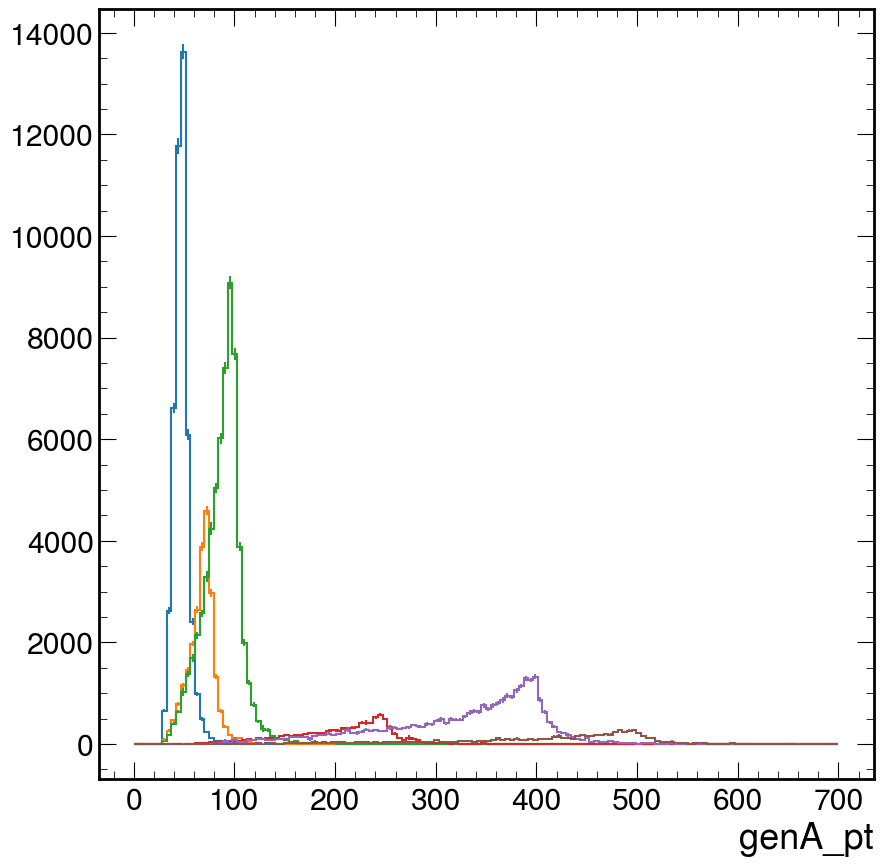

In [12]:
output["out"]["2Mu2E_100GeV_5GeV_4mm"]["hists"]["genA_pt"][ch,:].plot()
output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genA_pt"][ch,:].plot()
output["out"]["2Mu2E-200GeV_5GeV_2mm"]["hists"]["genA_pt"][ch,:].plot()
output["out"]["2Mu2E-500GeV_5GeV_0p8mm"]["hists"]["genA_pt"][ch,:].plot()
output["out"]["2Mu2E-800GeV_5GeV_0p5"]["hists"]["genA_pt"][ch,:].plot()
output["out"]["2Mu2E-1000Gev_5Gev_0p4"]["hists"]["genA_pt"][ch,:].plot()


Text(0, 1, '')

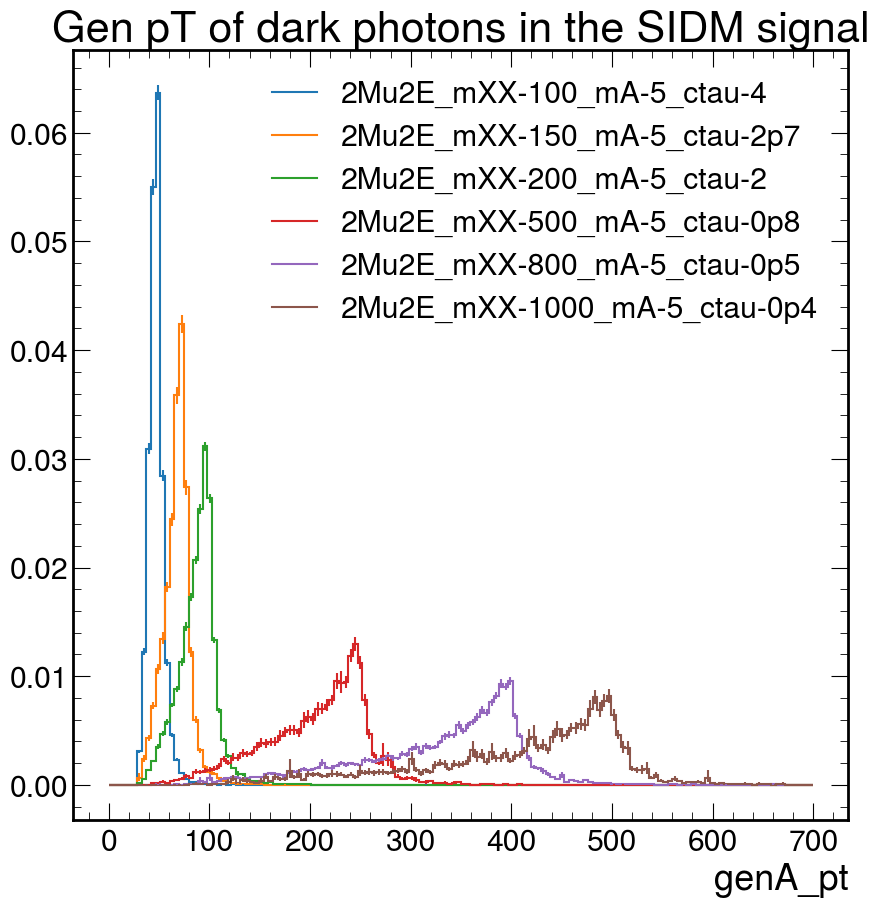

In [15]:
hep.histplot(output["out"]["2Mu2E_100GeV_5GeV_4mm"]["hists"]["genA_pt"]["2mu2e",:], density=True)
hep.histplot(output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genA_pt"]["2mu2e",:], density=True)
hep.histplot(output["out"]["2Mu2E-200GeV_5GeV_2mm"]["hists"]["genA_pt"]["2mu2e",:], density=True)
hep.histplot(output["out"]["2Mu2E-500GeV_5GeV_0p8mm"]["hists"]["genA_pt"]["2mu2e",:], density=True)
hep.histplot(output["out"]["2Mu2E-800GeV_5GeV_0p5"]["hists"]["genA_pt"]["2mu2e",:], density=True)
hep.histplot(output["out"]["2Mu2E-1000Gev_5Gev_0p4"]["hists"]["genA_pt"]["2mu2e",:], density=True)
plt.legend(["2Mu2E_mXX-100_mA-5_ctau-4", "2Mu2E_mXX-150_mA-5_ctau-2p7", 
            "2Mu2E_mXX-200_mA-5_ctau-2","2Mu2E_mXX-500_mA-5_ctau-0p8",
            "2Mu2E_mXX-800_mA-5_ctau-0p5","2Mu2E_mXX-1000_mA-5_ctau-0p4"])
plt.title("Gen pT of dark photons in the SIDM signal")
plt.ylabel("")